1. **Imports**

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2. **Loading our dataset**

In [2]:
train_set = '/Users/lohries/Desktop/Python/Machine_Learning/Exercises/Csv/Titanic/train.csv'
test_set = '/Users/lohries/Desktop/Python/Machine_Learning/Exercises/Csv/Titanic/test.csv'

In [3]:
train_set = pd.read_csv(train_set)
test_set = pd.read_csv(test_set)

In [4]:
train_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


3. **Analises**

In [6]:
train_set.isnull().any() #Returning True means that in this collumns we have some missing velues

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
test_set.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

3.1 ***Let's work with this collumns that present missing values***

In [8]:
train_set["Age"] = train_set["Age"].fillna(train_set["Age"].mean())
test_set["Age"] =  test_set["Age"].fillna(test_set["Age"].mean())


In [9]:
test_set["Fare"] = test_set["Fare"].fillna(test_set["Fare"].mean())

In [10]:
train_set["Cabin"] = train_set["Cabin"].fillna(train_set["Cabin"].mode()[0]) #Mode is the value that appears most often
test_set["Cabin"] = test_set["Cabin"].fillna(test_set["Cabin"].mode()[0]) #In adittion, "Cabin" collumn doesn't contain any number

In [11]:
train_set["Embarked"] = train_set["Embarked"].fillna(train_set["Embarked"].mode()[0])

3.2 ***Corrigindo alguns dados***

In [12]:
train_set["Sex"] = train_set["Sex"].map({"male": 1, "female": 0}) #Mapping based on dict

test_set["Sex"] = test_set["Sex"].map({"male": 1, "female": 0})
display(train_set["Sex"])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [13]:
train_set["Embarked"] = train_set["Embarked"].map({'S': 0, 'C' : 1, 'Q' : 2})
test_set["Embarked"] = test_set["Embarked"].map({'S': 0, 'C' : 1, 'Q' : 2})
display(train_set["Embarked"])

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

3.3 ***Calculando o "correlation coefficient"***

In [14]:
collumns = ["Pclass", "Sex", "Age", "Fare", "Embarked", "Parch", "SibSp", "Survived"]
correlation = train_set[collumns].corr()
display(correlation)

,Pclass,Sex,Age,Fare,Embarked,Parch,SibSp,Survived
Pclass,1.000000,0.131900,-0.331339,-0.549500,0.045702,0.018443,0.083081,-0.338481
Sex,0.131900,1.000000,0.084153,-0.182333,-0.116569,-0.245489,-0.114631,-0.543351
Age,-0.331339,0.084153,1.000000,0.091566,0.007461,-0.179191,-0.232625,-0.069809
Fare,-0.549500,-0.182333,0.091566,1.000000,0.062142,0.216225,0.159651,0.257307
Embarked,0.045702,-0.116569,0.007461,0.062142,1.000000,-0.078665,-0.059961,0.106811
Parch,0.018443,-0.245489,-0.179191,0.216225,-0.078665,1.000000,0.414838,0.081629
SibSp,0.083081,-0.114631,-0.232625,0.159651,-0.059961,0.414838,1.000000,-0.035322
Survived,-0.338481,-0.543351,-0.069809,0.257307,0.106811,0.081629,-0.035322,1.000000


<Axes: >

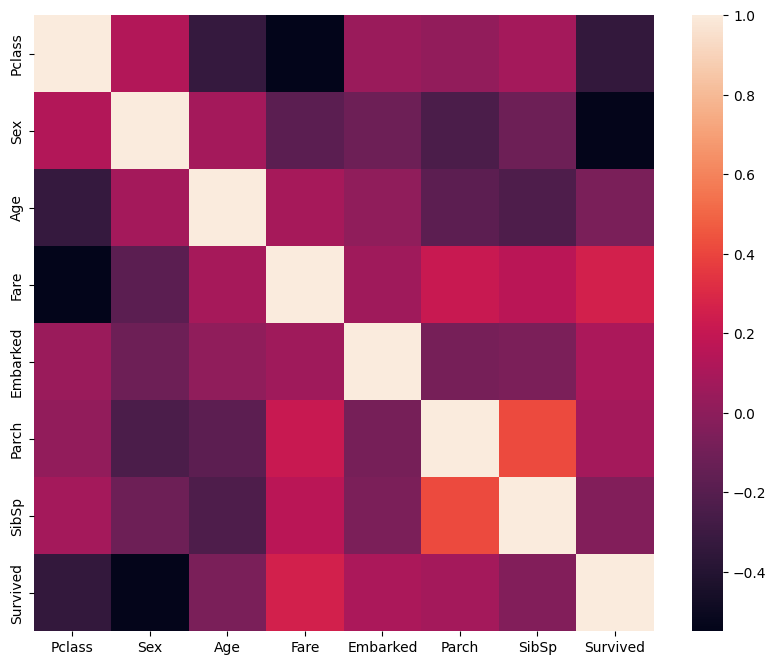

In [24]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation)
